In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
import numpy as np
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
import plotly.express as px
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer, InterclusterDistance
import warnings
#import cufflinks as cf
from plotly.offline import init_notebook_mode, iplot
warnings.filterwarnings("ignore")

In [2]:
# Para Notebooks
init_notebook_mode(connected=True)

In [3]:
# Para offline use
#cf.go_offline()

In [4]:
credit = pd.read_excel('credit_data.xlsx')

In [5]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [7]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [8]:
credit['Job_des'] = credit['Job'].map({0:'unskilled_no_resident',1:'unskilled_resident',2:'skilled',3:'highly_skilled'})

In [9]:
numerical_credit = credit.drop('Job', axis=1).select_dtypes(exclude='O')

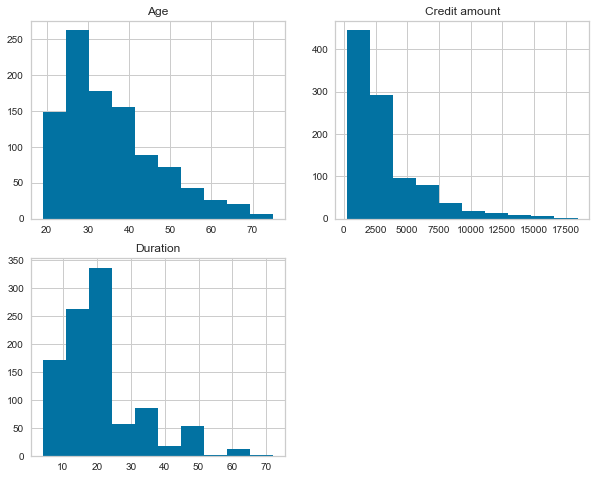

In [10]:
plt.figure(figsize=(10, 8))
k = 0
cols = numerical_credit.columns
for i, j in zip(range(len(cols)), cols):
    k = k+1
    plt.subplot(2, 2, k)
    plt.hist(numerical_credit.iloc[:, i])
    plt.title(j)

In [11]:
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

In [12]:
distancia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_credit)
    distancia.append(kmeans.inertia_)

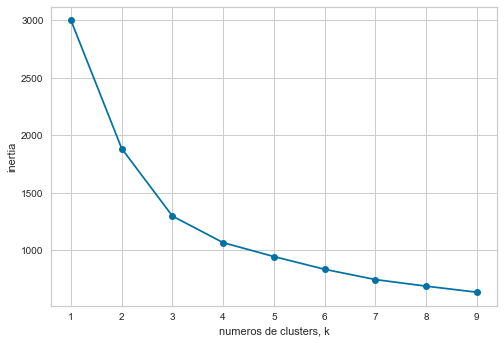

In [13]:
plt.plot(range(1, 10), distancia, '-o')
plt.xlabel('numeros de clusters, k')
plt.ylabel('inertia')
plt.xticks(range(1, 10))
plt.show()

In [14]:
coef_sil = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_credit)
    coef_sil.append(silhouette_score(scaled_credit,kmeans.labels_,metric = 'euclidean'))

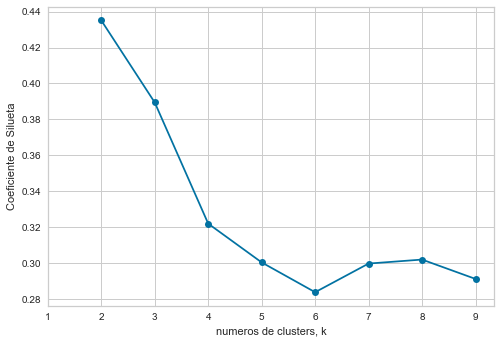

In [15]:
plt.plot(range(2, 10), coef_sil, '-o')
plt.xlabel('numeros de clusters, k')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(range(1, 10))
plt.show()

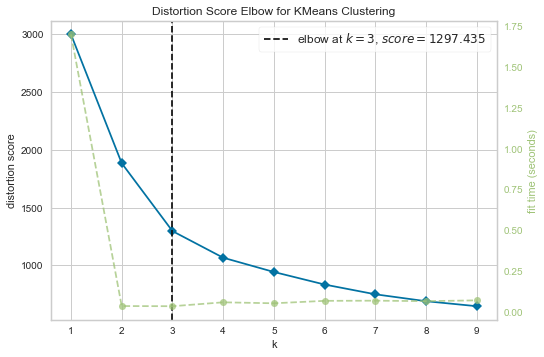

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Crear una instancia del visualizador y modelo de agrupación en clústeres
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10)) #evalua de 1 a 10 grupos

visualizer.fit(scaled_credit)        # ajustar los datos al visualizador
visualizer.show()        # Mostrar figura

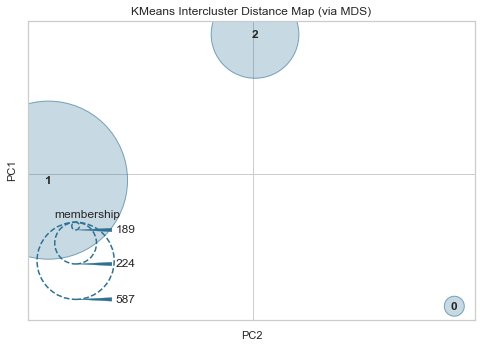

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [17]:
model = KMeans(3)
visualizer = InterclusterDistance(model)

visualizer.fit(scaled_credit)        # ajustar los datos al visualizador
visualizer.show() 

In [18]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_credit)

KMeans(n_clusters=3)

In [19]:
numerical_credit['Cluster'] = kmeans.predict(scaled_credit)

In [20]:
numerical_credit['Cluster'].value_counts()

0    587
2    224
1    189
Name: Cluster, dtype: int64

In [21]:
centroides = pd.DataFrame(kmeans.cluster_centers_)
centroides = pd.DataFrame(scaler.inverse_transform(centroides))
centroides.columns = numerical_credit.drop('Cluster',axis=1).columns
centroides

,Age,Credit amount,Duration
0,29.654174,2207.459966,16.916525
1,34.756614,7609.634921,39.275132
2,51.651786,2398.473214,15.848214


In [22]:
mas_cercano, distancia = pairwise_distances_argmin_min(centroides, numerical_credit.drop('Cluster', axis =1))

In [23]:
credit.loc[mas_cercano[0]]

Age                                  25
Sex                                male
Job                                   1
Housing                            rent
Saving accounts                  little
Checking account                    NaN
Credit amount                      2210
Duration                             10
Purpose             furniture/equipment
Risk                                bad
Job_des              unskilled_resident
Name: 864, dtype: object

In [24]:
credit.loc[mas_cercano[1]]

Age                             46
Sex                           male
Job                              3
Housing                        own
Saving accounts                NaN
Checking account               NaN
Credit amount                 7629
Duration                        48
Purpose                   business
Risk                          good
Job_des             highly_skilled
Name: 294, dtype: object

In [25]:
credit.loc[mas_cercano[2]]

Age                      50
Sex                    male
Job                       2
Housing                 own
Saving accounts         NaN
Checking account        NaN
Credit amount          2390
Duration                 12
Purpose                 car
Risk                   good
Job_des             skilled
Name: 994, dtype: object

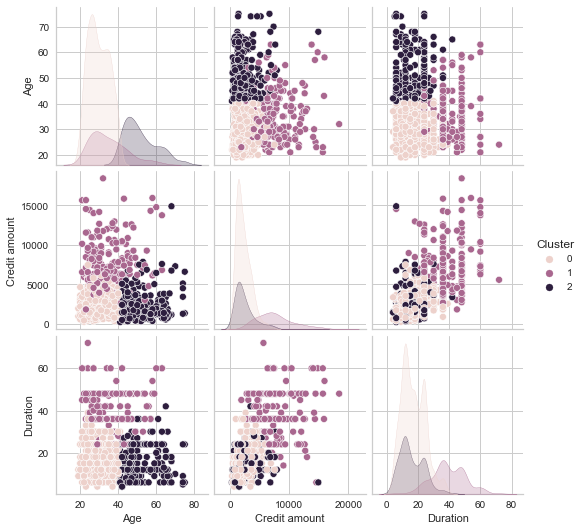

In [26]:
sns.pairplot(numerical_credit,hue='Cluster')

In [27]:
fig = px.scatter_3d(centroides,
                    x='Age',
                    y='Credit amount',
                    z='Duration',
                    color = list(centroides.index))
fig.show()

In [28]:
fig = px.scatter_3d(numerical_credit,
                    x='Age',
                    y='Credit amount',
                    z='Duration',
                    color = numerical_credit['Cluster'])
fig.show()

# K Prototype

In [29]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
 10  Job_des           1000 non-null   object
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [30]:
credit.pivot_table(index='Risk',columns='Checking account', values='Job_des',aggfunc='count')

Checking account,little,moderate,rich
Risk,,,
bad,135,105,14
good,139,164,49


In [31]:
credit.pivot_table(index='Risk',columns='Saving accounts', values='Job_des',aggfunc='count')

Saving accounts,little,moderate,quite rich,rich
Risk,,,,
bad,217,34,11,6
good,386,69,52,42


In [32]:
credit_kpro = credit.drop('Job',axis=1).copy()

In [33]:
credit_kpro['Checking account'] = np.where(credit['Checking account'].isnull(),
                                           np.where(credit['Risk']=='bad','little','moderate'),
                                           credit['Checking account'])

In [34]:
credit_kpro['Saving accounts'] = np.where(credit['Saving accounts'].isnull(),
                                           'little',
                                           credit['Saving accounts'])

In [35]:
credit_kpro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Housing           1000 non-null   object
 3   Saving accounts   1000 non-null   object
 4   Checking account  1000 non-null   object
 5   Credit amount     1000 non-null   int64 
 6   Duration          1000 non-null   int64 
 7   Purpose           1000 non-null   object
 8   Risk              1000 non-null   object
 9   Job_des           1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


In [36]:
age_scaler = StandardScaler()

credit_kpro['Age'] = age_scaler.fit_transform(credit_kpro[['Age']])

In [37]:
amt_scaler = StandardScaler()

credit_kpro['Credit amount'] = amt_scaler.fit_transform(credit_kpro[['Credit amount']])

In [38]:
dur_scaler = StandardScaler()

credit_kpro['Duration'] = dur_scaler.fit_transform(credit_kpro[['Duration']])

In [39]:
posicion = [credit_kpro.columns.get_loc(col) for col in list(credit_kpro.select_dtypes('object').columns)]

In [40]:
credit_kpro_np = credit_kpro.to_numpy()

In [41]:
perdida = []
K = range(1,10)
for num_clusters in list(K):
    kproto = KPrototypes(n_clusters=num_clusters, init = "Huang", random_state = 0,verbose=1)
    kproto.fit_predict(credit_kpro_np, categorical = posicion)
    perdida.append(kproto.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 4263.499999999998
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 4263.499999999998
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 4263.499999999998
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 4263.499999999998
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 4263.499999999998
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 4263.499999999998
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 0, ncost: 4263.499999999998
Init: initial

Run: 2, iteration: 5/100, moves: 90, ncost: 2563.003990677769
Run: 2, iteration: 6/100, moves: 30, ncost: 2558.5950672155104
Run: 2, iteration: 7/100, moves: 11, ncost: 2557.9834721141888
Run: 2, iteration: 8/100, moves: 5, ncost: 2557.8362842430724
Run: 2, iteration: 9/100, moves: 2, ncost: 2557.8200162715284
Run: 2, iteration: 10/100, moves: 0, ncost: 2557.8200162715284
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 237, ncost: 2578.7097568370696
Run: 3, iteration: 2/100, moves: 48, ncost: 2564.968299222896
Run: 3, iteration: 3/100, moves: 28, ncost: 2559.064082780588
Run: 3, iteration: 4/100, moves: 12, ncost: 2558.227161071147
Run: 3, iteration: 5/100, moves: 7, ncost: 2557.9985689125756
Run: 3, iteration: 6/100, moves: 0, ncost: 2557.9985689125756
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 273, ncost: 2593.268586606697
Run: 4, iteration: 2/100, mo

Run: 6, iteration: 3/100, moves: 53, ncost: 2414.9060944423613
Run: 6, iteration: 4/100, moves: 33, ncost: 2411.683863064224
Run: 6, iteration: 5/100, moves: 17, ncost: 2410.150963554932
Run: 6, iteration: 6/100, moves: 17, ncost: 2408.1359939604095
Run: 6, iteration: 7/100, moves: 32, ncost: 2404.1310660886847
Run: 6, iteration: 8/100, moves: 37, ncost: 2397.942840436226
Run: 6, iteration: 9/100, moves: 43, ncost: 2391.1986263164144
Run: 6, iteration: 10/100, moves: 47, ncost: 2384.0899574558325
Run: 6, iteration: 11/100, moves: 88, ncost: 2330.8726349666786
Run: 6, iteration: 12/100, moves: 85, ncost: 2318.2490921661497
Run: 6, iteration: 13/100, moves: 24, ncost: 2315.7006384422275
Run: 6, iteration: 14/100, moves: 20, ncost: 2314.4721989764125
Run: 6, iteration: 15/100, moves: 10, ncost: 2313.613532191865
Run: 6, iteration: 16/100, moves: 19, ncost: 2311.8402699534818
Run: 6, iteration: 17/100, moves: 6, ncost: 2311.720516535319
Run: 6, iteration: 18/100, moves: 1, ncost: 2311.7130

Run: 5, iteration: 3/100, moves: 65, ncost: 2212.804923952589
Run: 5, iteration: 4/100, moves: 35, ncost: 2207.05070111424
Run: 5, iteration: 5/100, moves: 26, ncost: 2203.284523430834
Run: 5, iteration: 6/100, moves: 20, ncost: 2201.842214277403
Run: 5, iteration: 7/100, moves: 27, ncost: 2188.9303301986897
Run: 5, iteration: 8/100, moves: 47, ncost: 2186.803967368615
Run: 5, iteration: 9/100, moves: 5, ncost: 2186.6858789582184
Run: 5, iteration: 10/100, moves: 0, ncost: 2186.6858789582184
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 278, ncost: 2373.1276225413353
Run: 6, iteration: 2/100, moves: 156, ncost: 2296.142781737154
Run: 6, iteration: 3/100, moves: 105, ncost: 2263.5841167571916
Run: 6, iteration: 4/100, moves: 43, ncost: 2252.792441964132
Run: 6, iteration: 5/100, moves: 43, ncost: 2241.756976180628
Run: 6, iteration: 6/100, moves: 27, ncost: 2238.594756047901
Run: 6, iteration: 7/100, moves: 2, ncost: 223

Run: 5, iteration: 9/100, moves: 10, ncost: 2064.9307569401485
Run: 5, iteration: 10/100, moves: 4, ncost: 2064.782782760662
Run: 5, iteration: 11/100, moves: 4, ncost: 2064.725275788266
Run: 5, iteration: 12/100, moves: 1, ncost: 2064.702530419735
Run: 5, iteration: 13/100, moves: 0, ncost: 2064.702530419735
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 300, ncost: 2248.086489135812
Run: 6, iteration: 2/100, moves: 143, ncost: 2174.920274610914
Run: 6, iteration: 3/100, moves: 131, ncost: 2128.198014528136
Run: 6, iteration: 4/100, moves: 68, ncost: 2109.544095205076
Run: 6, iteration: 5/100, moves: 29, ncost: 2106.207405520978
Run: 6, iteration: 6/100, moves: 26, ncost: 2104.126558638968
Run: 6, iteration: 7/100, moves: 33, ncost: 2100.8350075461994
Run: 6, iteration: 8/100, moves: 20, ncost: 2099.0853608824796
Run: 6, iteration: 9/100, moves: 16, ncost: 2097.780935882954
Run: 6, iteration: 10/100, moves: 8, ncost: 20

Run: 5, iteration: 8/100, moves: 17, ncost: 2007.027103943013
Run: 5, iteration: 9/100, moves: 7, ncost: 2006.721944192631
Run: 5, iteration: 10/100, moves: 2, ncost: 2006.6992729673618
Run: 5, iteration: 11/100, moves: 3, ncost: 2006.6624230935597
Run: 5, iteration: 12/100, moves: 0, ncost: 2006.6624230935597
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 286, ncost: 2075.9073128565296
Run: 6, iteration: 2/100, moves: 79, ncost: 2042.264136686668
Run: 6, iteration: 3/100, moves: 72, ncost: 2021.5115160116707
Run: 6, iteration: 4/100, moves: 43, ncost: 2013.7583847258406
Run: 6, iteration: 5/100, moves: 47, ncost: 2000.6531320082918
Run: 6, iteration: 6/100, moves: 33, ncost: 1997.9716229725857
Run: 6, iteration: 7/100, moves: 24, ncost: 1991.5107592348102
Run: 6, iteration: 8/100, moves: 28, ncost: 1988.0597822308935
Run: 6, iteration: 9/100, moves: 22, ncost: 198

Run: 5, iteration: 12/100, moves: 4, ncost: 1931.2019334080856
Run: 5, iteration: 13/100, moves: 0, ncost: 1931.2019334080856
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 347, ncost: 1945.5004330860552
Run: 6, iteration: 2/100, moves: 95, ncost: 1934.616425364872
Run: 6, iteration: 3/100, moves: 69, ncost: 1918.9053513237798
Run: 6, iteration: 4/100, moves: 67, ncost: 1910.017084990408
Run: 6, iteration: 5/100, moves: 42, ncost: 1904.4141301290808
Run: 6, iteration: 6/100, moves: 37, ncost: 1901.6994253867229
Run: 6, iteration: 7/100, moves: 26, ncost: 1899.2854820474442
Run: 6, iteration: 8/100, moves: 38, ncost: 1893.725906997618
Run: 6, iteration: 9/100, moves: 27, ncost: 1890.4858267158857
Run: 6, iteration: 10/100, moves: 23, ncost: 1887.2610947172252
Run: 6, iteration: 11/100, moves: 27, ncost: 1884.5893880672886
Run: 6, iteration: 12/100, moves: 14, ncost: 1883.7435554464962
Run: 6, iteration: 13/100, moves: 11,

Run: 4, iteration: 5/100, moves: 14, ncost: 1871.8734002209849
Run: 4, iteration: 6/100, moves: 4, ncost: 1871.7760243243001
Run: 4, iteration: 7/100, moves: 3, ncost: 1871.7106235533813
Run: 4, iteration: 8/100, moves: 1, ncost: 1871.6938819981876
Run: 4, iteration: 9/100, moves: 0, ncost: 1871.6938819981876
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 342, ncost: 1889.7274228928775
Run: 5, iteration: 2/100, moves: 85, ncost: 1869.22127693644
Run: 5, iteration: 3/100, moves: 68, ncost: 1852.3762475225215
Run: 5, iteration: 4/100, moves: 38, ncost: 1847.4945173805988
Run: 5, iteration: 5/100, moves: 23, ncost: 1845.7286689445575
Run: 5, iteration: 6/100, moves: 5, ncost: 1845.3481593149395
Run: 5, iteration: 7/100, moves: 1, ncost: 1845.3351523654114
Run: 5, iteration: 8/100, moves: 0, ncost: 1845.3351523654114
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, mov

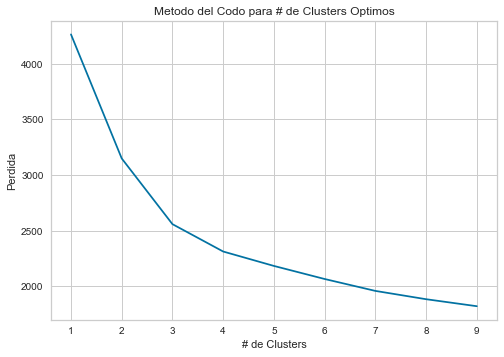

In [42]:
plt.plot(K, perdida, 'bx-')
plt.xlabel('# de Clusters')
plt.ylabel('Perdida')
plt.title('Metodo del Codo para # de Clusters Optimos')
plt.show()

In [43]:
kproto = KPrototypes(n_clusters=3, init = "Huang", random_state = 0)

In [44]:
kproto.fit(credit_kpro_np, categorical = posicion)

KPrototypes(gamma=0.5, init='Huang', n_clusters=3, random_state=0)

In [45]:
X = credit_kpro.select_dtypes(['float','int64'])
y = kproto.labels_
s = silhouette_score(X,y,metric = 'euclidean')
s

0.3790686587069249

In [46]:
credit_kpro['Cluster'] = kproto.labels_

In [47]:
centroides = pd.DataFrame(kproto.cluster_centroids_)
num = centroides[centroides.columns[:-7]]

for col in num.columns:
    num[col] = pd.to_numeric(num[col])

num[0] = age_scaler.inverse_transform(num[[0]])
num[1] = amt_scaler.inverse_transform(num[[1]])
num[2] = dur_scaler.inverse_transform(num[[2]])
cat = centroides[centroides.columns[-7:]]
df_centroides = pd.concat([cat,num],axis=1)
columnas_cat = credit_kpro.select_dtypes('object').columns
columnas_num = credit_kpro.select_dtypes(['int64','float64']).columns
df_centroides.columns = list(columnas_cat) + list(columnas_num)
df_centroides

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk,Job_des,Age,Credit amount,Duration
0,male,own,little,moderate,radio/TV,good,skilled,29.269841,2184.077601,17.093474
1,male,own,little,moderate,car,good,skilled,34.994709,7695.126984,38.973545
2,male,own,little,moderate,car,good,skilled,50.557377,2370.930328,15.758197


In [48]:
df_credit = pd.concat([credit[['Age','Credit amount','Duration','Risk']],numerical_credit['Cluster']],axis=1)

In [49]:
df_credit_scaled = pd.concat([pd.DataFrame(scaled_credit,columns=['Age','Credit amount','Duration']),
                                           numerical_credit['Cluster'],df_credit['Risk']],
                             axis=1)

In [50]:
df_credit_scaled[df_credit_scaled['Cluster'] == 0]['Risk'].value_counts()

good    419
bad     168
Name: Risk, dtype: int64

In [51]:
df_credit_scaled[df_credit_scaled['Cluster'] == 1]['Risk'].value_counts()

good    104
bad      85
Name: Risk, dtype: int64

In [52]:
df_credit_scaled[df_credit_scaled['Cluster'] == 2]['Risk'].value_counts()

good    177
bad      47
Name: Risk, dtype: int64

In [53]:
df_cluster_0 = df_credit_scaled[df_credit_scaled['Cluster'] == 0].reset_index(drop=True)
df_cluster_1 = df_credit_scaled[df_credit_scaled['Cluster'] == 1].reset_index(drop=True)
df_cluster_2 = df_credit_scaled[df_credit_scaled['Cluster'] == 2].reset_index(drop=True)

<AxesSubplot:title={'center':'Distibución de nivel de riesgo'}>

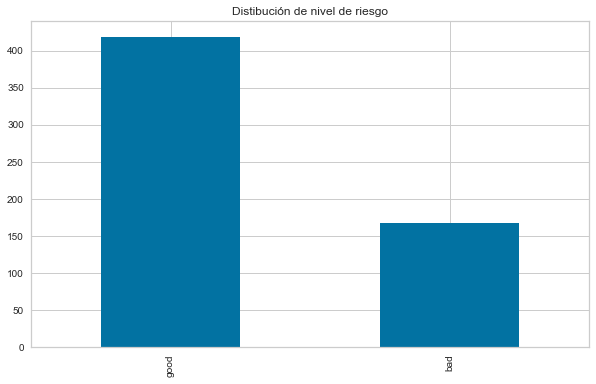

In [54]:
df_cluster_0['Risk'].value_counts().plot(kind='bar',figsize=(10, 6), title='Distibución de nivel de riesgo')

<AxesSubplot:title={'center':'Distibución de nivel de riesgo'}>

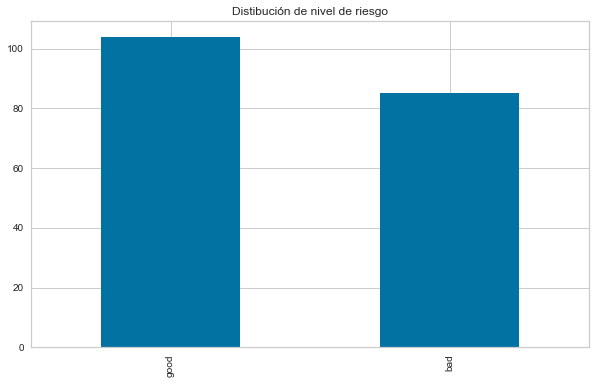

In [55]:
df_cluster_1['Risk'].value_counts().plot(kind='bar',figsize=(10, 6), title='Distibución de nivel de riesgo')

<AxesSubplot:title={'center':'Distibución de nivel de riesgo'}>

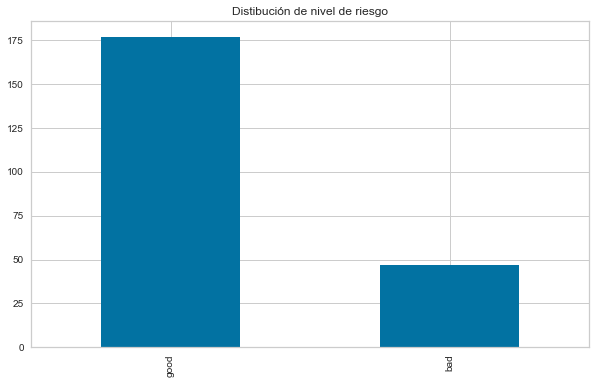

In [56]:
df_cluster_2['Risk'].value_counts().plot(kind='bar',figsize=(10, 6), title='Distibución de nivel de riesgo')